# Classification de la Glace

In [2]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from ice_classification.preprocessing import prepare_data, scale_features, binarize_target
from ice_classification.model import train_model_gridsearch
from ice_classification.utils import plot_roc_curve
from ice_classification.eda import plot_target_distribution, summarize_target

## Extraction des données

In [3]:
X, y=prepare_data()
X_scaled, scaler = scale_features(X)
y_binary, threshold = binarize_target(y)

In [4]:
X.head()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,year,month,day
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,2013,1,1
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,2013,1,2
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,2013,1,3
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,2013,1,4
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,2013,1,5


## Analyse descriptive

Distribution des valeurs de Y1 (brutes) :
      Y1  count
0     0   2262
1     1     62
2     2     22
3     6     13
4     5     11
..  ...    ...
84   98      1
85   13      1
86   30      1
87   56      1
88  100      1

[89 rows x 2 columns]


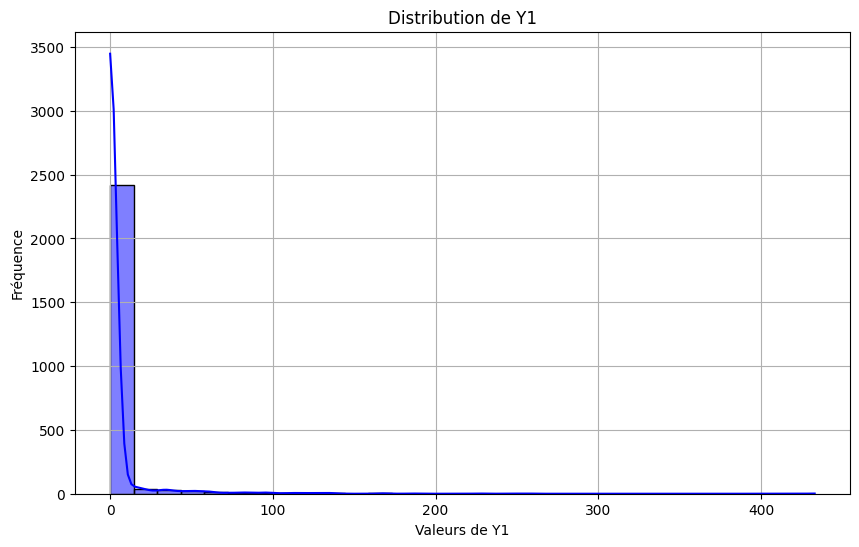

In [3]:
summarize_target(y)
plot_target_distribution(y)

## Determination du seuil optimal pour Random Forest

In [4]:
param_grid_rf={
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5]
}
random_forest = train_model_gridsearch(X_scaled, y, model_class=RandomForestClassifier(), param_grid=param_grid_rf)

## Cross Validation et Hyperparamètres de Random Forest

In [5]:
print("Meilleurs hyperparamètres :", random_forest["best_params"])
print(f"F1-score optimal : {random_forest['f1_score']:.4f}")
print(f"Seuil optimal : {random_forest['optimal_threshold']:.2f}")
print(f"Accuracy : {random_forest['accuracy']:.4f}")
print("Rapport de classification :\n", random_forest["classification_report"])
print("Matrice de confusion :\n", random_forest["confusion_matrix"])

Meilleurs hyperparamètres : {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
F1-score optimal : 0.7234
Seuil optimal : 0.60
Accuracy : 0.9492
Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       458
           1       0.85      0.63      0.72        54

    accuracy                           0.95       512
   macro avg       0.90      0.81      0.85       512
weighted avg       0.95      0.95      0.95       512

Matrice de confusion :
 [[452   6]
 [ 20  34]]


## Determination du seuil optimal pour Bagging

In [8]:
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [None, 10, 20],
    'max_samples': [0.5, 1.0]
}

bagging=train_model_gridsearch(X, y, model_class=BaggingClassifier(DecisionTreeClassifier()), param_grid=param_grid_bagging)


## Cross Validation et hyperparamètres pour Bagging

In [9]:
print("Meilleurs hyperparamètres :", bagging["best_params"])
print(f"F1-score optimal : {bagging['f1_score']:.4f}")
print(f"Seuil optimal : {bagging['optimal_threshold']:.2f}")
print(f"Accuracy : {bagging['accuracy']:.4f}")
print("Rapport de classification :\n", bagging["classification_report"])
print("Matrice de confusion :\n", bagging["confusion_matrix"])

Meilleurs hyperparamètres : {'estimator__max_depth': 20, 'max_samples': 0.5, 'n_estimators': 100}
F1-score optimal : 0.7200
Seuil optimal : 0.41
Accuracy : 0.9453
Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.78      0.67      0.72        54

    accuracy                           0.95       512
   macro avg       0.87      0.82      0.84       512
weighted avg       0.94      0.95      0.94       512

Matrice de confusion :
 [[448  10]
 [ 18  36]]


## Cross Validation et hyperparamètres pour Decision Tree

In [10]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

decision_tree=train_model_gridsearch(X, y, model_class=DecisionTreeClassifier(), param_grid=param_grid_dt)

In [11]:
print("Meilleurs hyperparamètres :", decision_tree["best_params"])
print(f"F1-score optimal : {decision_tree['f1_score']:.4f}")
print(f"Seuil optimal : {decision_tree['optimal_threshold']:.2f}")
print(f"Accuracy : {decision_tree['accuracy']:.4f}")
print("Rapport de classification :\n", decision_tree["classification_report"])
print("Matrice de confusion :\n", decision_tree["confusion_matrix"])

Meilleurs hyperparamètres : {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
F1-score optimal : 0.6306
Seuil optimal : 0.41
Accuracy : 0.9199
Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       458
           1       0.61      0.65      0.63        54

    accuracy                           0.92       512
   macro avg       0.79      0.80      0.79       512
weighted avg       0.92      0.92      0.92       512

Matrice de confusion :
 [[436  22]
 [ 19  35]]


## Cross Validation et hyperparamètres pour Extra Trees

In [12]:
param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

extra_trees=train_model_gridsearch(X, y, model_class=ExtraTreesClassifier(n_estimators=100), param_grid=param_grid_et)

In [13]:
print("Meilleurs hyperparamètres :", extra_trees["best_params"])
print(f"F1-score optimal : {extra_trees['f1_score']:.4f}")
print(f"Seuil optimal : {extra_trees['optimal_threshold']:.2f}")
print(f"Accuracy : {extra_trees['accuracy']:.4f}")
print("Rapport de classification :\n", extra_trees["classification_report"])
print("Matrice de confusion :\n", extra_trees["confusion_matrix"])

Meilleurs hyperparamètres : {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
F1-score optimal : 0.7327
Seuil optimal : 0.36
Accuracy : 0.9473
Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.79      0.69      0.73        54

    accuracy                           0.95       512
   macro avg       0.88      0.83      0.85       512
weighted avg       0.94      0.95      0.95       512

Matrice de confusion :
 [[448  10]
 [ 17  37]]


## Tracage des Courbes ROC

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: User

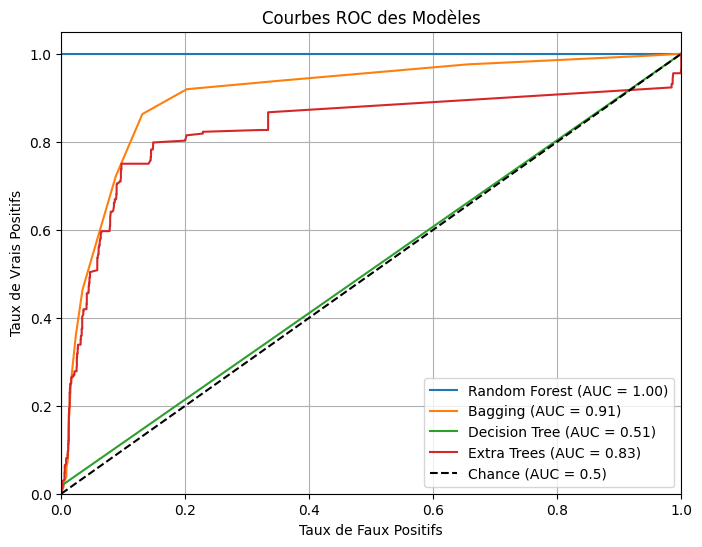

In [14]:
y_true= random_forest["best_model"].predict(X_scaled)
y_scores_rf = random_forest["best_model"].predict_proba(X_scaled)[:, 1]
y_true_bagging = bagging["best_model"].predict(X_scaled)
y_scores_bagging = bagging["best_model"].predict_proba(X_scaled)[:, 1]
y_true_et = extra_trees["best_model"].predict(X_scaled)
y_scores_et = extra_trees["best_model"].predict_proba(X_scaled)[:, 1]
y_true_dt = decision_tree["best_model"].predict(X_scaled)
y_scores_dt = decision_tree["best_model"].predict_proba(X_scaled)[:, 1]

models = {
    "Random Forest": y_scores_rf,
    "Bagging": y_scores_bagging,
    "Decision Tree": y_scores_dt,
    "Extra Trees": y_scores_et,
}

plot_roc_curve(y_true, models)